<a href="https://colab.research.google.com/github/akanksha0911/DeepLearning-DeepDive-Assignment1-/blob/main/Gradient_Descent_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**By Akanksha Rawat**

Gradient Descent in Linear Regression

Linear Regression

y= mx+b or F = y- (mx+b)
In order to fit the regression line we need to tune two parameters : Slope(m) and intercept(b)
Once optimal parameters are found, we usually evaluate the results with Mean Squared Error , and we try to minimize it.


y = estimated dependent value.
b = constant or bias.
m = regression coefficient or slope.
x = value of the independent variable

In [188]:
#Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Kaggle_data/GD_LR/data_LinearRegression.csv')

In [189]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [190]:
#Preparing the data
x = np.array(df.iloc[:,0])
y = np.array(df.iloc[:,1])

In [191]:
x

array([ 24.,  50.,  15.,  38.,  87.,  36.,  12.,  81.,  25.,   5.,  16.,
        16.,  24.,  39.,  54.,  60.,  26.,  73.,  29.,  31.,  68.,  87.,
        58.,  54.,  84.,  58.,  49.,  20.,  90.,  48.,   4.,  25.,  42.,
         0.,  60.,  93.,  39.,   7.,  21.,  68.,  84.,   0.,  58.,  19.,
        36.,  19.,  59.,  51.,  19.,  33.,  85.,  44.,   5.,  59.,  14.,
         9.,  75.,  69.,  10.,  17.,  58.,  74.,  21.,  51.,  19.,  50.,
        24.,   0.,  12.,  75.,  21.,  64.,   5.,  58.,  32.,  41.,   7.,
         4.,   5.,  49.,  90.,   3.,  11.,  32.,  83.,  25.,  83.,  26.,
        76.,  95.,  53.,  77.,  42.,  25.,  54.,  55.,   0.,  73.,  35.,
        86.,  90.,  13.,  46.,  46.,  32.,   8.,  71.,  28.,  24.,  56.,
        49.,  79.,  90.,  89.,  41.,  27.,  58.,  26.,  31.,  70.,  71.,
        39.,   7.,  48.,  56.,  45.,  41.,   3.,  37.,  24.,  68.,  47.,
        27.,  68.,  74.,  95.,  79.,  21.,  95.,  54.,  56.,  80.,  26.,
        25.,   8.,  95.,  94.,  54.,   7.,  99.,  3

In [192]:
y

array([21.54945196, 47.46446305, 17.21865634, 36.58639803, 87.28898389,
       32.46387493, 10.78089683, 80.7633986 , 24.61215147,  6.96331907,
       11.23757338, 13.53290206, 24.60323899, 39.40049976, 48.43753838,
       61.69900319, 26.92832418, 70.4052055 , 29.34092408, 25.30895192,
       69.02934339, 84.99484703, 57.04310305, 50.5921991 , 83.02772202,
       57.05752706, 47.95883341, 24.34226432, 94.68488281, 48.03970696,
        7.08132338, 21.99239907, 42.33151664,  0.32908944, 61.92303698,
       91.17716423, 39.45358014,  5.99606961, 22.59015942, 61.18044414,
       85.02778957, -1.28631089, 61.94273962, 21.96033347, 33.66194193,
       17.60946242, 58.5630564 , 52.82390762, 22.1363481 , 35.07467353,
       86.18822311, 42.63227697,  4.09817744, 61.2229864 , 17.70677576,
       11.85312574, 80.23051695, 62.64931741,  9.6168598 , 20.02797699,
       61.7510743 , 71.61010303, 23.77154623, 51.90142035, 22.66073682,
       50.02897927, 26.68794368,  0.3769119 ,  6.806419  , 77.33

In [193]:
class LinearRegressionGD:
  def __init__(self, x, y):
    self.data = x
    self.label = y

    self.m = 0
    self.b = 0
    self.n = len(x)
    

  def fit(self, epochs, lr):
    #implementing Gradient Descent
    past_costs = []
    for i in range(epochs):
      y_pred = self.m * self.data + self.b

      #Calculating derivatives w.r.t Parameters
      D_m = (-2/self.n)*sum(self.data * (self.label - y_pred))
      D_b = (-1/self.n)*sum(self.label-y_pred)

      #Updating Parameters
      self.m = self.m - lr * D_m
      self.b = self.b - lr * D_b

  def predict(self , inp):
     past_costs = []  
     y_pred = self.m * inp + self.b 
     error = y_pred - self.label
     cost = 1/(2*self.m) * np.dot(error.T, error)
     past_costs.append(cost)
     return y_pred, past_costs

  


In [194]:
#Creating the class object
regressor = LinearRegressionGD(x,y)

In [195]:
#Training the model with .fit method
regressor.fit(1000 , 0.0001) # epochs-1000 , learning_rate - 0.0001

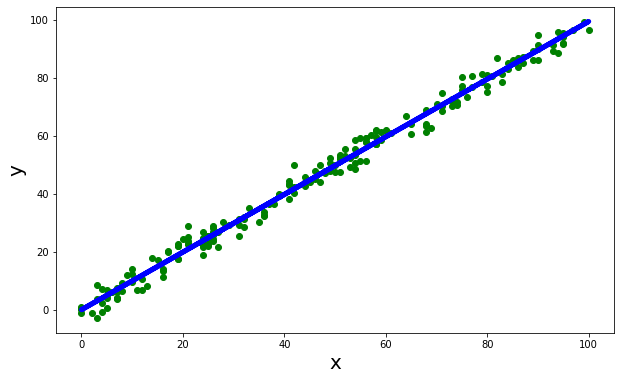

In [196]:
plt.figure(figsize = (10,6))
plt.scatter(x, y, color = 'green')
plt.plot(x , y_pred , color = 'blue' , lw = 5)
plt.xlabel('x' , size = 20)
plt.ylabel('y', size = 20)
plt.show()

**Stochastic Gradient Descent from Scratch**

Stochastic Gradient Descent

Here, instead of calculating the partial derivative for the whole training set, the calcuation is only done on one random sample(stochastic meaning random). This is great because the calcuations are only needed to be done on one training example instead of the whole training set, making it much faster and ideal for large datasets.

However,due to its inherent randomness, stochastic gradient descent does not have a smooth descend as in batch gradient descent. This means that it will bounce around, and while it may produce good parameters,they will rarely be optimal.

In [197]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [198]:
X = load_boston().data
Y = load_boston().target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [199]:
load_boston().feature_names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [200]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [201]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [202]:
X_train = pd.DataFrame(data = X_train, columns=load_boston().feature_names)
X_train['Price'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns=load_boston().feature_names)
X_test['Price'] = list(y_test)
X_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.207356,-0.499979,1.548016,-0.263603,0.588213,-1.839367,1.107402,-1.125110,-0.618160,0.206735,1.227257,0.424543,3.108073,14.4
1,-0.388865,0.346774,-0.589747,-0.263603,-0.797821,0.327487,-0.367661,0.075090,-0.733637,-1.049493,0.056963,0.401853,-0.666430,24.4
2,-0.335735,-0.499979,1.548016,-0.263603,0.588213,0.037907,1.043114,-0.799984,-0.618160,0.206735,1.227257,0.398461,0.639367,18.1
3,-0.394852,2.463658,-1.265584,-0.263603,-1.352235,0.052172,-1.746292,1.968937,-0.502683,-0.257013,-1.653466,0.089342,-1.056896,22.5
4,-0.391456,-0.499979,2.086394,-0.263603,0.215716,-0.495604,0.853820,-0.811511,-0.849114,-1.254951,0.282020,0.204545,0.776596,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,-0.368566,-0.499979,-0.529609,-0.263603,-0.546603,-0.856509,0.189506,0.464292,-0.502683,-0.673799,0.507076,0.357058,-0.099123,18.5
350,-0.392217,1.405216,-1.093761,-0.263603,-1.031715,1.240447,-1.524854,1.316070,-0.502683,-0.022204,-1.473421,0.349573,-1.353990,36.4
351,-0.384504,-0.499979,-0.153031,-0.263603,-0.078816,-0.410014,0.485947,-0.491616,-0.387206,0.177384,-0.303127,0.396590,-0.302844,19.2
352,-0.375118,-0.499979,-0.596907,-0.263603,-0.936425,-0.397176,0.589523,0.933261,-0.733637,-0.990791,-0.258116,0.375888,0.899677,16.6


In [203]:
def sgd_regressor(X, y, learning_rate=0.2, n_epochs=1000, k=40):
    
    w = np.random.randn(1,13)  # Randomly initializing weights
    b = np.random.randn(1,1)   # Random intercept value
    
    epoch=1
    
    while epoch <= n_epochs:
        
        temp = X.sample(k)

        X_tr = temp.iloc[:,0:13].values
        y_tr = temp.iloc[:,-1].values
        
        Lw = w
        Lb = b
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
              
            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            
            w = w - learning_rate * Lw
            b = b - learning_rate * Lb
            
            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)
        
        loss = mean_squared_error(y_pred, y_tr)
            
        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        learning_rate = learning_rate/1.02
        
    return w,b

def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        temp_ = x
        X_test = temp_.iloc[:,0:13].values
        y = np.asscalar(np.dot(w,X_test[i])+b)
        y_pred.append(y)

    return np.array(y_pred)
    
w,b = sgd_regressor(X_train,y_train)
y_pred_customsgd = predict(X_test,w,b)

Epoch: 1, Loss: 504.268
Epoch: 2, Loss: 539.309
Epoch: 3, Loss: 548.471
Epoch: 4, Loss: 583.972
Epoch: 5, Loss: 526.407
Epoch: 6, Loss: 487.461
Epoch: 7, Loss: 476.998
Epoch: 8, Loss: 484.241
Epoch: 9, Loss: 498.833
Epoch: 10, Loss: 515.719
Epoch: 11, Loss: 494.049
Epoch: 12, Loss: 525.881
Epoch: 13, Loss: 608.148
Epoch: 14, Loss: 483.855
Epoch: 15, Loss: 494.580
Epoch: 16, Loss: 501.241
Epoch: 17, Loss: 506.831
Epoch: 18, Loss: 559.096
Epoch: 19, Loss: 598.419
Epoch: 20, Loss: 529.239
Epoch: 21, Loss: 547.135
Epoch: 22, Loss: 521.769
Epoch: 23, Loss: 557.220
Epoch: 24, Loss: 555.852
Epoch: 25, Loss: 483.364
Epoch: 26, Loss: 527.824
Epoch: 27, Loss: 529.805
Epoch: 28, Loss: 498.444
Epoch: 29, Loss: 528.729
Epoch: 30, Loss: 561.422
Epoch: 31, Loss: 569.585
Epoch: 32, Loss: 561.403
Epoch: 33, Loss: 499.470
Epoch: 34, Loss: 505.889
Epoch: 35, Loss: 531.355
Epoch: 36, Loss: 510.340
Epoch: 37, Loss: 525.032
Epoch: 38, Loss: 505.121
Epoch: 39, Loss: 515.639
Epoch: 40, Loss: 517.000
Epoch: 41

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead


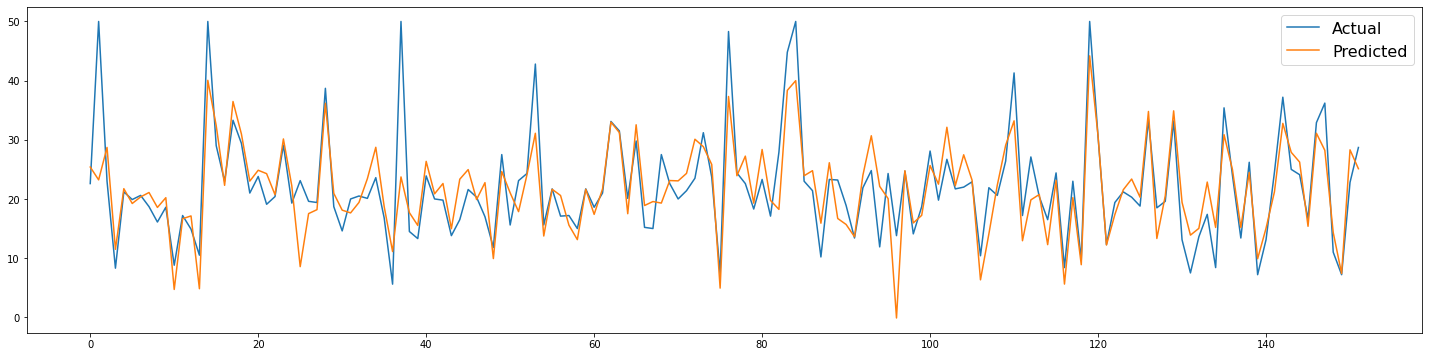

Mean Squared Error : 27.712527014915263


In [204]:
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))
